In [1]:
filepath = '~/Documents/RedRoot/csv/Attendee/July 29 Expert Class 88102934640 - Attendee Report.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import math
import string
import re
plt.rcParams['figure.dpi'] = 150
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

defaultpie = {
    "autopct":"(%1.1f%%)",
    "pctdistance":0.8,
    "labeldistance":1.1,
    "rotatelabels":False,
    "textprops":{'fontsize':'xx-small'}
}

def get_count(key,df):
    return df.groupby(key)[key].count()

def shorten(s):
    if (s.startswith('Division')):
        i = s.index('(')
        return s[0:i]
    else:
        return s
    
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
    
def get_percent(counts):
    return np.array(list(map(lambda x: round(x / sum(counts),3)*100, counts)))

def get_table(s):
    return pd.DataFrame(np.vstack([s.values, get_percent(s.values)]).T,
                       columns=['Count', '%'], index=s.index)

In [3]:
df = pd.read_csv(filepath, index_col=False).drop_duplicates('Email')
df = df[df['NRCP Membership'] == 'Non-Member']
df = df[df['Attended'] == 'Yes']

In [4]:
age = get_count('Age',df)
get_table(age)

,Count,%
Age,,
60 and above,26.0,6.5
"=""19-29""",162.0,40.3
"=""30-39""",88.0,21.9
"=""40-49""",80.0,19.9
"=""50-59""",42.0,10.4
below 18,4.0,1.0


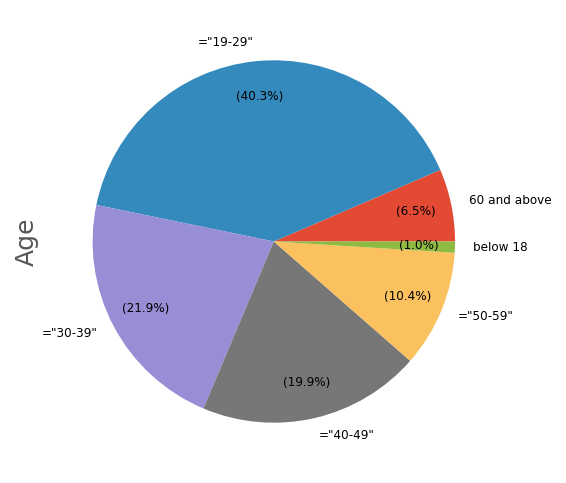

In [5]:
age.plot.pie(**defaultpie)
plt.show()

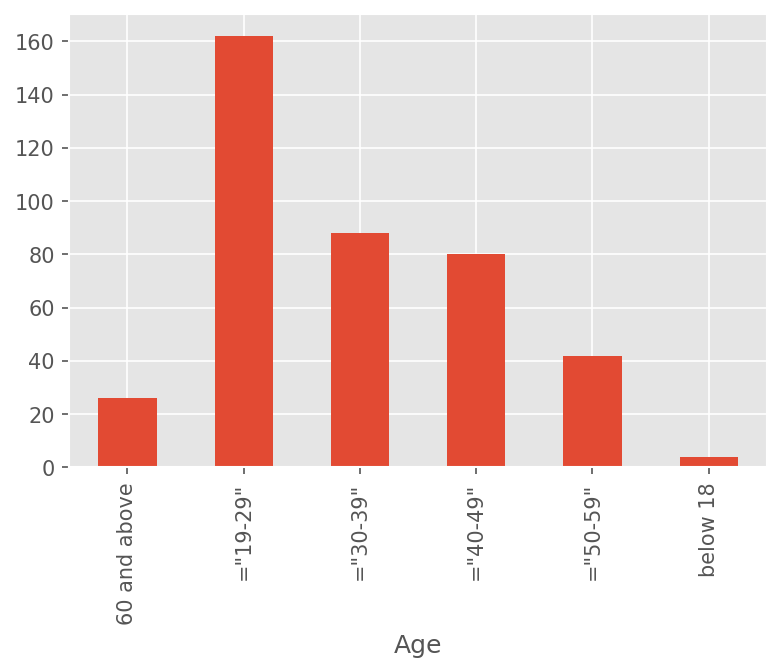

In [6]:
age.plot.bar()
plt.show()

In [7]:
sex = get_count('Sex', df)
get_table(sex)

,Count,%
Sex,,
Female,254.0,63.2
Male,145.0,36.1
Rather not say,3.0,0.7


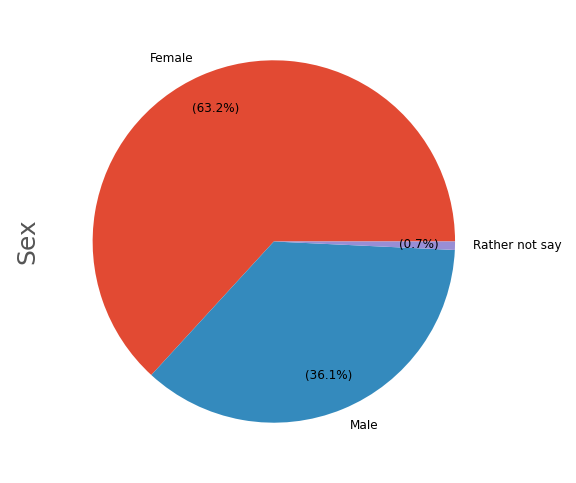

In [8]:
sex.plot.pie(**defaultpie)
plt.show()

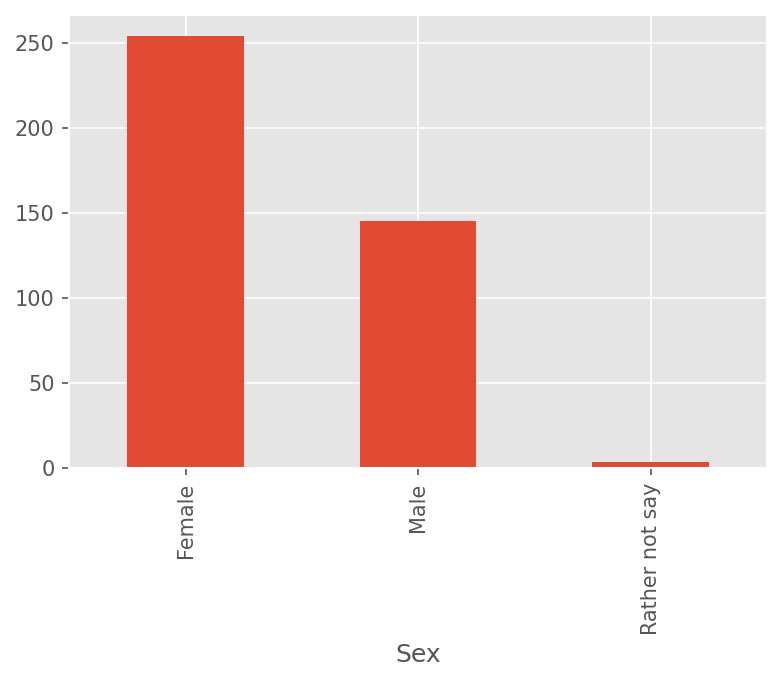

In [9]:
sex.plot.bar()
plt.show()

In [10]:
region = get_count('Region (in the Philippines)', df)
get_table(region)

,Count,%
Region (in the Philippines),,
BARMM,6.0,1.5
CAR,21.0,5.2
I,13.0,3.2
II,31.0,7.7
III,27.0,6.7
IV-A,58.0,14.4
IV-B,5.0,1.2
IX,5.0,1.2
NCR,124.0,30.8


<AxesSubplot:ylabel='Region (in the Philippines)'>

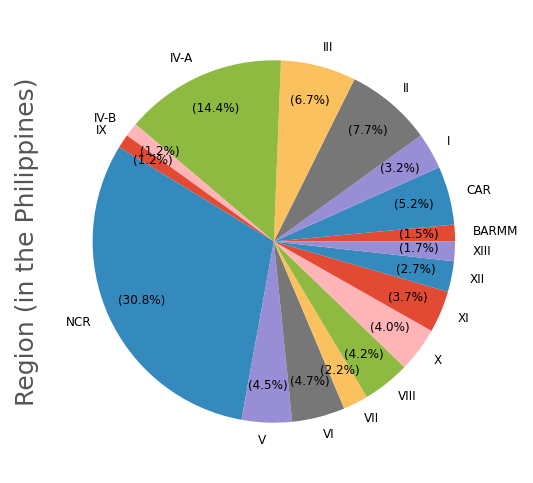

In [13]:
ex = [0] * len(region)
ex[-2] = 0
ex[-1] = 0
region.plot.pie(**defaultpie,explode=ex, startangle=0)

In [19]:
org = get_count('Organization', df)
org.index = map(lambda x: x.upper(), org.index)
org.index = map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), org.index)
org.index = map(lambda x: 'MATH ORGANIZATION' if x.startswith('MATH') else x, org.index)
org.index = map(lambda x: 'DOST' if x.startswith('DOST') else x, org.index)
org.index = map(lambda x: 'DOST' if x.startswith('DEPARTMENT OF SCIENCE AND TECHNOLOGY') else x, org.index)
org.index = map(lambda x: 'DEPED' if x.startswith('DEPARTMENT OF EDUCATION') else x, org.index)
org.index = map(lambda x: 'DEPED' if x.startswith('DEPED') else x, org.index)
org.index = map(lambda x: re.sub(' +', ' ', x), org.index)
org.index = map(lambda x: x.strip(), org.index)
rules = {
    'COLLEGE OF EDUCATION': 'COLLEGE',
    'WALA': 'NONE',
    'NOBE': 'NONE',
    'DLSUDOST': 'DLSU',
    'DEPED PHILIPPINES': 'DEPED',
    'BUALACAN STATE UNIVERSITY': 'BULACAN STATE UNIVERSITY',
    'PHILIPPINE NORMAL UNIVERSITYMANILA': 'PHILIPPINE NORMAL UNIVERSITY MANILA',
    'PRIVATE TEACHER': 'PRIVATE SCHOOL',
    'DEPARTMENT OF EDUCATION': 'DEPED',
    'MINDANAO STATE UNIVERSITYMAGUINDANAO': 'MSU MAGUINDANAO',
    'TCUMC': 'TAGUIG CITY UNIVERSITY MATH CLUB',
    'TEACHING': 'NONE',
    'STUDENT': 'NONE',
    'UP CEBU MATH MAJOR CIRCLE': 'UP CEBU MATH MAJORS CIRCLE',
    'UPC MMC': 'UP CEBU MATH MAJORS CIRCLE',
    'UPLB': 'UNIVERSITY OF THE PHILIPPINES LOS BAÑOS',
    'UP': 'UNIVERSITY OF THE PHILIPPINES',
    'SST': 'SOCIETY OF STUDENT TEACHERS',
    'MABALACAT CITY COLLEGE': 'MABALACAT CITY COLLEGE',
    'PARTTIDO STATE UNIVERSITY': 'PARTIDO STATE UNIVERSITY',
    'PSHSWVC': 'PHILIPPINE SCIENCE HIGH SCHOOL WESTERN VISAYAS CAMPUS',
    'PHILIPPINE SCIENCE HIGH SCHOOL WVC': 'PHILIPPINE SCIENCE HIGH SCHOOL WESTERN VISAYAS CAMPUS',
    'TCU': 'TAGUIG CITY UNIVERSTIY',
    'TCU MATH CLUB': 'TAGUIG CITY UNIVERSITY MATH CLUB',
    'ADVENTIST UNIVERSITY OF THE PHIL': 'ADVENTIST UNIVERSITY OF THE PHILIPPINES',
    'FSUU': 'FATHER SATURNINO URIOS UNIVERSITY',
    'QCU': 'QUEZON CITY UNIVERSITY',
    'CAVITE STATE UNIVERISTY': 'CAVITE STATE UNIVERSITY',
    'EDUCATION':'ACADEME',
    'PUP PHYSICS SOCIET': 'PUP PHYSICS SOCIETY',
    'PUPSBS': 'PUP SOCIETY OF BIOLOGY STUDENTS',
    'UNIVERSITY OF THE PHILIPPINES LOS BANOS': 'UNIVERSITY OF THE PHILIPPINES LOS BAÑOS',
    'UP LOS BANOS': 'UNIVERSITY OF THE PHILIPPINES LOS BAÑOS',
    'UPCEBU MATH MAJOR CIRCLE': 'UP CEBU MATH MAJORS CIRCLE',
    'UPD': 'UNIVERSITY OF THE PHILIPPINES DILIMAN',
    'UP DILIMAN': 'UNIVERSITY OF THE PHILIPPINES DILIMAN',
    'USA': 'UNIVERSITY OF SAN AGUSTIN',
    'UST': 'UNIVERSITY OF SANTO TOMAS',
    'POLYTECHNIC UNIVERSITY OF THE PHILIPPINE': 'POLYTECHNIC UNIVERSITY OF THE PHILIPPINES',
    'COLLEGE OF PUBLIC HEALTH UNIVERSITY OF THE PHILPPINES MANILA': 'COLLEGE OF PUBLIC HEALTH UNIVERSITY OF THE PHILIPPINES MANILA',
    'SCHOOL': 'ACADEME',
    'SCIENCE': 'NONE',
    'UP MANILA': 'UNIVERSITY OF THE PHILIPPINES MANILA',
    'UP MINDANAO': 'UNIVERSITY OF THE PHILIPPINES MINDANAO',
    'UNIVERSITY OF THE PHILIPPINESDILIMAN': 'UNIVERSITY OF THE PHILIPPINES DILIMAN'
}
org = org.rename(index=rules)
org = org.groupby(org.index).sum()
org

9637409881                                                                       1
ACADEME                                                                          7
ADAMSON UNIVERSITY                                                               1
ADU                                                                              1
AGRICULTURE OFFICE                                                               1
AIM                                                                              1
AMDABIDSSHEALTH                                                                  1
ANGELES UNIVERSITY FOUNDATION                                                    2
APSOM                                                                            1
ATENEO DE DAVAO UNIVERSITY                                                       2
ATENEO DE NAGA UNIVERSITY                                                        2
BAFS                                                                             1
BANG